(optim:tutorial:bridge)=
# Optimizing a bridge structure 


## Installation of the *truss* package

For this session, you will need the Python package Truss that can be download here:

https://github.com/lcharleux/truss/archive/master.zip

Dowload it, extract the content of the archive and put it in your work directory. Once this is completed, execute the cell below to check the install is working.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib widget
import sys, copy, os
from scipy import optimize

sys.path.append("truss-master")
try:
    import truss

    print("Truss is correctly installed")
except:
    print("Truss is NOT correctly installed !")

Truss is correctly installed


A short truss tutorial is available here:

http://truss.readthedocs.io/en/latest/tutorial.html

## Building the bridge structure

In this session, we will modelled a bridge structure using truss and optimize it using various criteria. The basic structure is introduced below. It is made of steel bars and loaded with one vertical force on $G$. The bridge is symmetrical so only the left half is modelled.

In [2]:
E = 210.0e9  # Young Modulus [Pa]
rho = 7800.0  # Density       [kg/m**3]
A = .9e-2  # Cross section [m**2]
sigmay = 400.0e6  # Yield Stress  [Pa]

# Model definition
model = truss.core.Model()  # Model definition

# NODES
# Deck
nA = model.add_node((0.0, 0.0), label="A")
nB = model.add_node((1.0, 0.0), label="B")
nC = model.add_node((2.0, 0.0), label="C")
nD = model.add_node((3.0, 0.0), label="D")
nE = model.add_node((4.0, 0.0), label="E")
nF = model.add_node((5.0, 0.0), label="F")
nG = model.add_node((6.0, 0.0), label="G")
# Upper structure
nH = model.add_node((1.0, 2.0), label="H")
nI = model.add_node((2.0, 2.0), label="I")
nJ = model.add_node((3.0, 2.0), label="J")
nK = model.add_node((4.0, 2.0), label="K")
nL = model.add_node((5.0, 2.0), label="L")
nM = model.add_node((6.0, 2.0), label="M")


# BOUNDARY CONDITIONS
nA.block[1] = True
nG.block[0] = True
nM.block[0] = True


# BARS
AC = model.add_bar(nA, nC, modulus=E, density=rho, section=A, yield_stress=sigmay)
CD = model.add_bar(nC, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
AD = model.add_bar(nA, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
CE = model.add_bar(nC, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
DF = model.add_bar(nD, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
DE = model.add_bar(nD, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
EF = model.add_bar(nE, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
EG = model.add_bar(nE, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
FH = model.add_bar(nF, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)
FG = model.add_bar(nF, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
GH = model.add_bar(nG, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)
AI = model.add_bar(nA, nI, modulus=E, density=rho, section=A, yield_stress=sigmay)
CI = model.add_bar(nC, nI, modulus=E, density=rho, section=A, yield_stress=sigmay)
IJ = model.add_bar(nI, nJ, modulus=E, density=rho, section=A, yield_stress=sigmay)
EJ = model.add_bar(nE, nJ, modulus=E, density=rho, section=A, yield_stress=sigmay)
CJ = model.add_bar(nC, nJ, modulus=E, density=rho, section=A, yield_stress=sigmay)
GK = model.add_bar(nG, nK, modulus=E, density=rho, section=A, yield_stress=sigmay)
JK = model.add_bar(nJ, nK, modulus=E, density=rho, section=A, yield_stress=sigmay)
EK = model.add_bar(nE, nK, modulus=E, density=rho, section=A, yield_stress=sigmay)
# STRUCTURAL LOADING
nG.force = np.array([0.0, -1.0e6])/2.
nE.force = np.array([0.0, -1.0e6])
nC.force = np.array([0.0, -1.0e6])

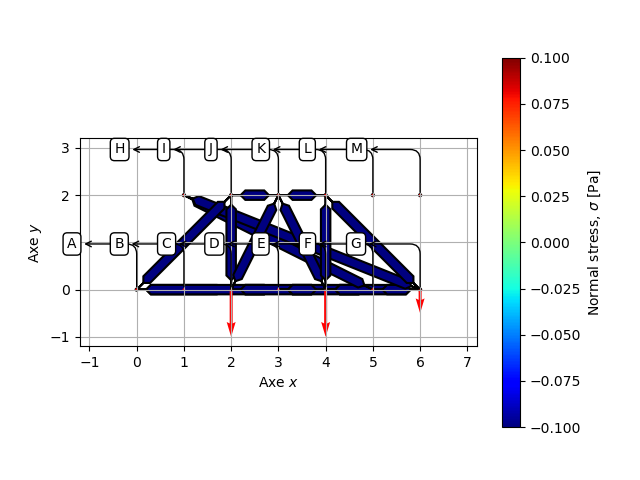

In [4]:
#model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")
plt.show()

### Detailed results at the nodes

In [132]:
model.data(at="nodes")

label coords           disp                     force             block  \
      o      x    y        ux        uy              Fx         Fy     bx   
0     A    0.0  0.0 -0.000923       0.0             0.0  2500000.0  False   
1     C    3.0  0.0  0.000123 -0.021977             0.0 -1000000.0  False   
2     D    3.0  3.0  0.010634 -0.020715             0.0        0.0  False   
3     E    6.0  0.0 -0.000048 -0.036984             0.0 -1000000.0  False   
4     F    6.0  3.0  0.005421 -0.037193             0.0        0.0  False   
5     G    9.0  0.0       0.0 -0.043203   161732.575314  -500000.0   True   
6     H    9.0  3.0       0.0 -0.043203 -3415433.143829        0.0   True   
7     I    3.0 -1.0 -0.005601 -0.021734             0.0        0.0  False   
8     J    6.0 -1.0 -0.003409 -0.036849             0.0        0.0  False   
9     K    9.0 -1.0       0.0 -0.043008  3253700.568514        0.0   True   

          
      by  
0   True  
1  False  
2  False  
3  False  
4  False  
5  False  
6  False  
7  False  
8  False  
9  False

### Detailed results on the bars

In [134]:
model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C   0.009  7800.0   658932.621618   0.001046  0.000349   
1     C  D   0.009  7800.0   795327.689015   0.001262  0.000421   
2     A  D   0.009  7800.0 -2884618.291995  -0.006475 -0.001526   
3     C  E   0.009  7800.0  -107850.979215  -0.000171 -0.000057   
4     D  F   0.009  7800.0 -3284138.621793  -0.005213 -0.001738   
5     D  E   0.009  7800.0  1759855.087659    0.00395  0.000931   
6     E  F   0.009  7800.0  -131294.522035  -0.000208 -0.000069   
7     E  G   0.009  7800.0    30438.053279   0.000048  0.000016   
8     F  H   0.009  7800.0 -3415433.143829  -0.005421 -0.001807   
9     F  G   0.009  7800.0   185678.493727   0.000417  0.000098   
10    G  H   0.009  7800.0             0.0        0.0       0.0   
11    A  I   0.009  7800.0  1455491.560381   0.002435   0.00077   
12    C  I   0.009  7800.0  -460266.844596  -0.000244 -0.000244   
13    I  J   0.009  7800.0  1380800.533787   0.002192  0.000731   
14    E  J   0.009  7800.0  -255594.533611  -0.000135 -0.000135   
15    C  J   0.009  7800.0   808260.883699   0.001352  0.000428   
16    G  K   0.009  7800.0  -368705.477965  -0.000195 -0.000195   
17    J  K   0.009  7800.0   2147584.13462   0.003409  0.001136   
18    E  K   0.009  7800.0   1165949.09615   0.001951  0.000617   

                              geometry                 props direction  \
              stress failure    volume    length        mass        dx   
0    73214735.735309   False     0.027       3.0       210.6       1.0   
1    88369743.223939   False     0.027       3.0       210.6       0.0   
2  -320513143.555007   False  0.038184  4.242641  297.833376  0.707107   
3   -11983442.135032   False     0.027       3.0       210.6       1.0   
4  -364904291.310386   False     0.027       3.0       210.6       1.0   
5   195539454.184284   False  0.038184  4.242641  297.833376  0.707107   
6   -14588280.226123   False     0.027       3.0       210.6       0.0   
7      3382005.91989   False     0.027       3.0       210.6       1.0   
8  -379492571.536509   False     0.027       3.0       210.6       1.0   
9    20630943.747482   False  0.038184  4.242641  297.833376  0.707107   
10               0.0   False     0.027       3.0       210.6       0.0   
11  161721284.486748   False   0.02846  3.162278  221.991892  0.948683   
12  -51140760.510618   False     0.009       1.0        70.2       0.0   
13  153422281.531854   False     0.027       3.0       210.6       1.0   
14  -28399392.623446   False     0.009       1.0        70.2       0.0   
15   89806764.855477   False   0.02846  3.162278  221.991892  0.948683   
16  -40967275.329433   False     0.009       1.0        70.2       0.0   
17  238620459.402195   False     0.027       3.0       210.6       1.0   
18  129549899.572237   False   0.02846  3.162278  221.991892  0.948683   

              
          dy  
0        0.0  
1        1.0  
2   0.707107  
3        0.0  
4        0.0  
5  -0.707107  
6        1.0  
7        0.0  
8        0.0  
9  -0.707107  
10       1.0  
11 -0.316228  
12      -1.0  
13       0.0  
14      -1.0  
15 -0.316228  
16      -1.0  
17       0.0  
18 -0.316228

### Dead (or structural) mass


In [135]:
m0 = model.mass()
m0 * 1.0e-3  # Mass in tons !

3.876075803938782

## Questions

**Question 1**: Verify that the yield stress is not exceeded anywhere, do you think this structure has an optimimum weight ? You can use the *state/failure* data available on the whole model.

In [136]:
# Example:
model.data(at="bars").state.failure

# ...

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
Name: failure, dtype: object

**Question 2**: Modify all the cross sections at the same time in order to minimize weight while keeping acceptable stress level.

In [137]:
model.data(at='bars').state.stress/1e6

0      73.214736
1      88.369743
2    -320.513144
3     -11.983442
4    -364.904291
5     195.539454
6      -14.58828
7       3.382006
8    -379.492572
9      20.630944
10           0.0
11    161.721284
12    -51.140761
13    153.422282
14    -28.399393
15     89.806765
16    -40.967275
17    238.620459
18      129.5499
Name: stress, dtype: object

In [138]:
Cs = np.abs(model.data(at='bars').state.stress) / sigmay
Cs = Cs.values.astype(np.float64)
Cs

array([0.18303684, 0.22092436, 0.80128286, 0.02995861, 0.91226073,
       0.48884864, 0.0364707 , 0.00845501, 0.94873143, 0.05157736,
       0.        , 0.40430321, 0.1278519 , 0.3835557 , 0.07099848,
       0.22451691, 0.10241819, 0.59655115, 0.32387475])

In [139]:
np.exp((Cs-1)*100)

array([3.30933506e-36, 1.46276571e-34, 2.34328016e-09, 7.44110629e-43,
       1.54714794e-04, 6.32380248e-23, 1.42709936e-42, 8.66459837e-44,
       5.93518479e-03, 6.46439769e-42, 3.72007598e-44, 1.34653354e-26,
       1.32766752e-38, 1.69108087e-27, 4.50792504e-41, 2.09506457e-34,
       1.04355949e-39, 3.00911653e-18, 4.32766304e-30])

In [153]:
def cost(X):
    nI.coords[1]  = X[0]
    nJ.coords[1]  = X[1]
    nK.coords[1] =  X[2]
    nD.coords[1]  = X[3]
    nF.coords[1]  = X[4]
    nH.coords[1] =  X[5]
    #nI.coords[1]  = X[3]
    #nJ.coords[1]  = X[4]
    #nH.coords[1]  = X[5]
 
    model.solve()
    m = model.mass()
    
    # Cs = np.abs(model.data(at='bars').state.stress) / sigmay
    # Cs = Cs.values.astype(np.float64)
    # faillure = np.exp((Cs-1)*1000)
    # faillure = np.sum(faillure) + 1
    # print(faillure)
    
    return m * np.abs(nG.displacement[1]) 

import scipy
x0 = np.array([-1.0, -1.0, -1.0, 3.0, 3.0, 3.0])
sol = scipy.optimize.minimize(cost, x0)
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 67.67800473615229
        x: [-3.368e+00 -4.913e+00 -5.944e+00  4.333e+00  6.358e+00
             7.122e+00]
      nit: 23
      jac: [ 2.861e-06  6.676e-06 -6.676e-06  7.629e-06  4.768e-06
             0.000e+00]
 hess_inv: [[ 1.482e-01  2.437e-03 ... -1.518e-01 -2.458e-01]
            [ 2.437e-03  3.438e-02 ... -1.069e-02  7.754e-03]
            ...
            [-1.518e-01 -1.069e-02 ...  1.941e-01  2.446e-01]
            [-2.458e-01  7.754e-03 ...  2.446e-01  4.687e-01]]
     nfev: 196
     njev: 28

Text(0, 0.5, 'Axe $y$')

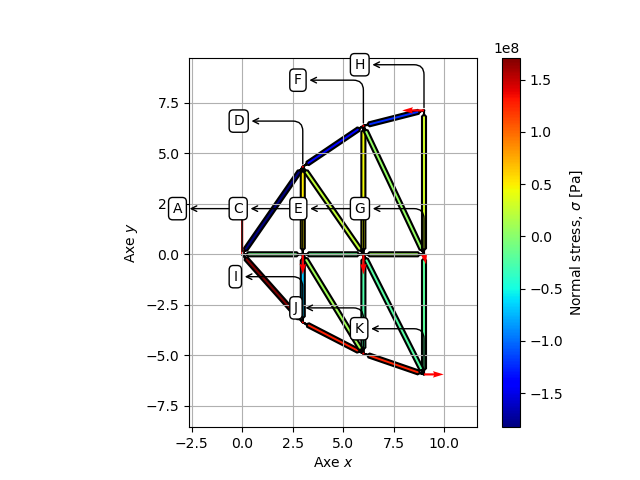

In [154]:
model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [149]:
x0 = np.array([-1.0, -1.0, -1.0, 3.0, 3.0, 3.0])
bounds = [(-2.0, .0), (-2.0, .0), (-2.0, .0), (.0, 10.0), (.0, 10.0), (.0, 10.0)]
sol = scipy.optimize.minimize(cost, x0, bounds=bounds, method='L-BFGS-B')

sol

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [-1.000e+00 -1.000e+00 -1.000e+00  3.000e+00  3.000e+00
             3.000e+00]
      nit: 0
      jac: [-8.830e-01  1.166e+01  4.067e+01  3.024e+01 -3.360e+01
            -4.423e+01]
     nfev: 14
     njev: 2
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>

Text(0, 0.5, 'Axe $y$')

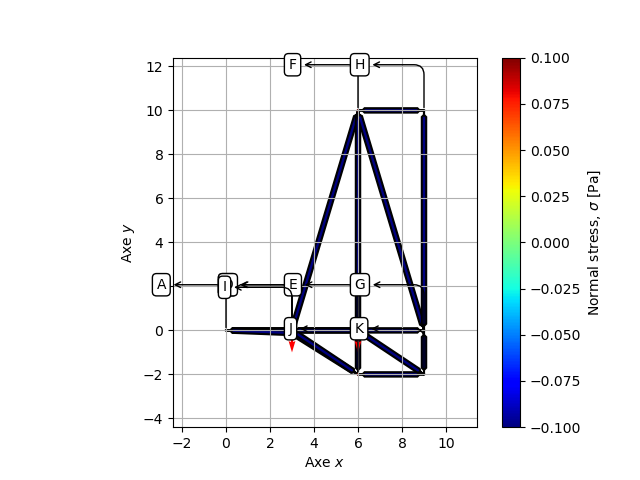

In [150]:
model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

**Question 3**: We want to modify the position along the $\vec y$ axis of the points $D$, $F$ and $H$ in order to minimize the vertical displacement of the node $G$ times the mass of the structure $\alpha$: 

$$
\alpha = |u_y(G)| m
$$

Where $u_y(G)$ is the displacement of the node $G$ along the $\vec y$ axis and $m$ the mass of the whole structure.

Do not further modify the sections determined in question 4. Comment the solution.

**Question 4**: Same question with displacements also along $\vec x$ of $C$, $D$, $E$ and $F$. Is it better ?

**Question 5**:  You can now try to perform topological optimization by removing/merging well chosen beams and nodes. In order to make the structure even more efficient.

**Question 6**: You are now asked to optimize the cross section along with the position of $C$, $D$, $E$ and $F$ in order to reach the yield stress in each individual beam.

### Auto

In [258]:
fix_points = np.array([[0., 0], [9., 0.], [9., 3.], [9., 6.]])
ex_points = np.atleast_2d(np.arange(1,9.,3))
ex_points = np.append(ex_points, np.zeros_like(ex_points),  axis=0).T

fix_points = np.append( fix_points, ex_points, axis=0)
fix_points
nb_fix = len(fix_points)
nb_fix

7

In [259]:
Nb_inerpoints = 5
points = np.append(fix_points, np.random.rand(Nb_inerpoints,2)*9, axis=0)
tri = matplotlib.tri.Triangulation(points[:,0], points[:,1])


<IPython.core.display.Javascript object>


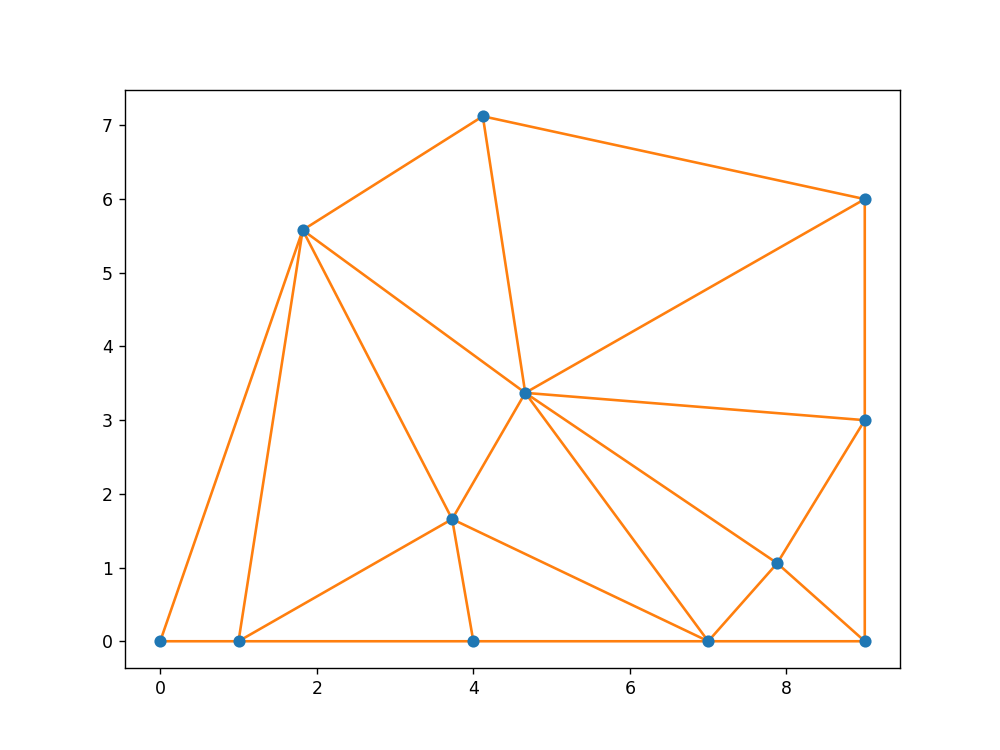

In [260]:
plt.figure()
plt.plot(points[:,0], points[:,1], 'o')
plt.triplot(tri)
plt.show()

In [261]:
E = 210.0e9  # Young Modulus [Pa]
rho = 7800.0  # Density       [kg/m**3]
A = .7e-2  # Cross section [m**2]
sigmay = 400.0e6  # Yield Stress  [Pa]

# Model definition
model = truss.core.Model()  # Model definition

# NODES
nodes = []
#nA = model.add_node((0.0, 0.0), label="A")
#nodes.append(nA)
#nG = model.add_node((9.0, 0.0), label="G")
#nodes.append(nG)

for i, p in enumerate(points):
    nodes.append(model.add_node((p[0], p[1]), label="n{:03d}".format(i)))


for i, e in enumerate(tri.edges):
    model.add_bar(nodes[e[0]], nodes[e[1]], modulus=E, density=rho, section=A, yield_stress=sigmay)
    
# BOUNDARY CONDITIONS
nodes[0].block[1] = True
nodes[1].block[0] = True
nodes[2].block[0] = True
nodes[3].block[0] = True

# STRUCTURAL LOADING
for i in range(nb_fix):
    nodes[i].force = np.array([0.0, -1.0e6])/2.


<IPython.core.display.Javascript object>


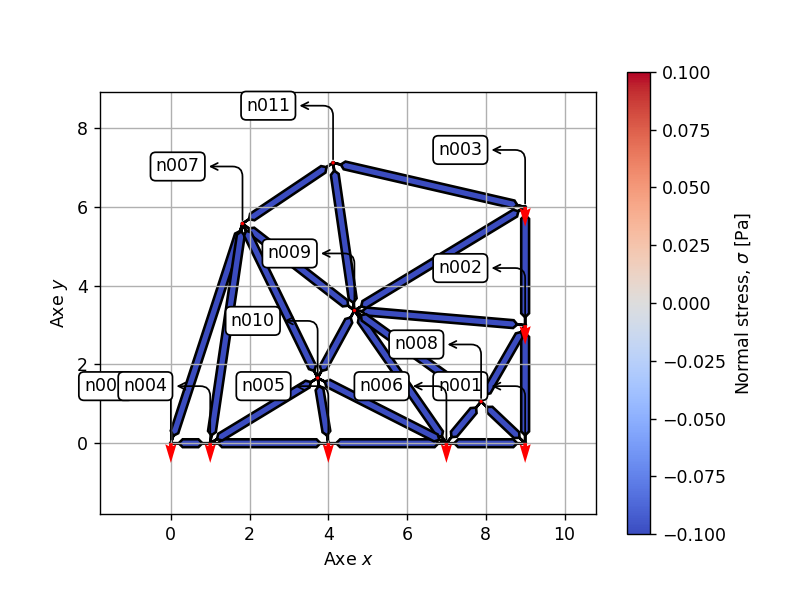

Text(0, 0.5, 'Axe $y$')

In [262]:
#model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [263]:
model.solve()

In [264]:
np.abs(model.data(at='bars').state.stress).std()/1e6

113.21630979116571

In [265]:
def cost(X):
    for i,id_nodes in enumerate(range(nb_fix,len(nodes))):
        nodes[id_nodes].coords[0] = X[i]
        nodes[id_nodes].coords[1] = X[Nb_inerpoints+i]
            
    model.solve()
    m = model.mass()    
    #err = (np.abs(model.data(at='bars').state.stress) - sigmay)/1e7
    #faillure = np.exp(err.values.astype(np.float)).sum()
    
    #return m * np.abs(nodes[1].data().disp.uy) * np.abs(model.data(at='bars').state.stress).std()/1e6
    return np.abs(model.data(at='bars').state.stress).std()/1e6

x0 = np.zeros(2*Nb_inerpoints)
for i,id_nodes in enumerate(range(nb_fix,len(nodes))):
        x0[i] = nodes[id_nodes].coords[0] 
        x0[Nb_inerpoints+i] = nodes[id_nodes].coords[1]
print(x0)
cost(x0)

[1.81992792 7.88148654 4.66282685 3.72895662 4.12081399 5.57983375
 1.05855664 3.37088904 1.65746524 7.12448703]


113.21630979116571

In [266]:
import scipy
sol = scipy.optimize.minimize(cost, x0)
sol

      fun: 78.2828596595655
 hess_inv: array([[ 1.89495908e-03,  3.60536666e-04, -9.02248832e-04,
         2.12972840e-04, -4.05309432e-04, -1.96950058e-03,
        -5.54413786e-04,  3.85300173e-04, -4.03581418e-04,
         1.46789229e-03],
       [ 3.60536666e-04,  4.17457493e-04, -1.97038710e-04,
        -3.58666295e-04, -9.74189518e-05, -1.66625237e-04,
        -2.11126265e-04,  2.73118101e-04, -1.83417273e-04,
         2.64053265e-04],
       [-9.02248832e-04, -1.97038710e-04,  9.69072982e-04,
        -7.81769094e-05,  1.58289094e-04,  1.34322659e-03,
         3.98788506e-04, -5.39045107e-04,  2.39559305e-04,
        -1.69710359e-03],
       [ 2.12972840e-04, -3.58666295e-04, -7.81769094e-05,
         5.22787744e-04, -7.10287317e-05, -4.95349744e-04,
         8.90056233e-05, -1.62795369e-04,  5.53102058e-05,
         1.56711557e-04],
       [-4.05309432e-04, -9.74189518e-05,  1.58289094e-04,
        -7.10287317e-05,  5.70381118e-04,  8.66671105e-04,
         1.88306353e-04, -4.678

<IPython.core.display.Javascript object>


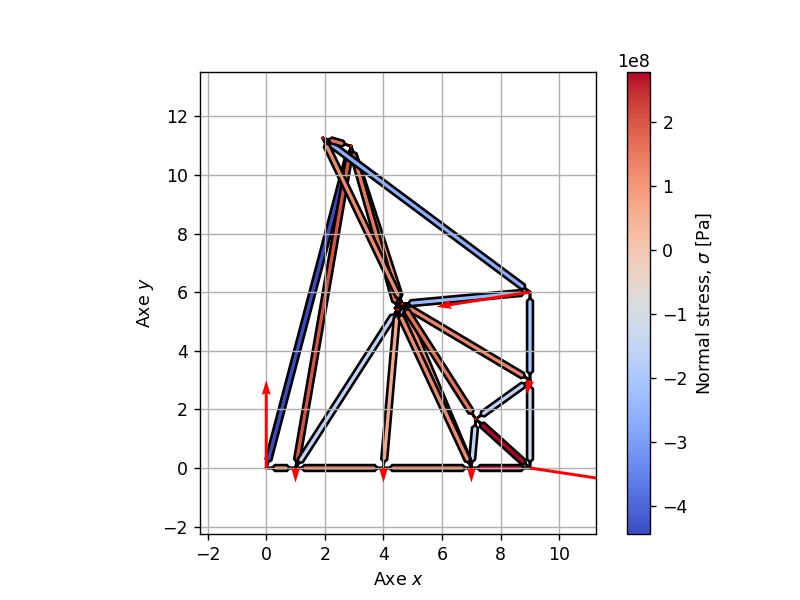

Text(0, 0.5, 'Axe $y$')

In [267]:
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=False, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")